<a href="https://colab.research.google.com/github/yasminshalabi811/first-challenge/blob/main/Eclat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSOCIATION ANALYSIS WITH ECLAT

**File:** Eclat.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# INSTALL AND IMPORT LIBRARIES
The Python library `pyECLAT` contains the implementation of the Eclat algorithm, which can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [1]:
pip install pyECLAT

If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [2]:
import sys
!{sys.executable} -m pip install pyECLAT

Once `pyECLAT` is installed, then load the libraries below.

In [3]:
import pandas as pd              # For dataframes
import matplotlib.pyplot as plt  # For plotting data
from pyECLAT import ECLAT        # For Eclat algorithm

# LOAD AND PREPARE DATA
For this demonstration, we'll use the dataset `Groceries.csv`, which comes from the R package `arules` and is saved as a CSV file. The data is in transactional format (as opposed to tabular format), which means that each row is a list of items purchased together and that the items may be in different order. There are 32 columns in each row, each column either contains a purchased items or NaN.

## Import Data

- To read read the dataset from a local CSV file, run the following cell.

In [4]:
df = pd.read_csv('Groceries.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# APPLY ECLAT

Call `ECLAT()` on `transactions_df` to fit a model. For parameters, `ECLAT.fit()` can take the minimum support, minimum confidence, minimum lift, and minimum items in a transaction. Only the pairs of items that satisfy these criteria will be returned.

As a note, increasing the number for `max_combination` will dramatically increase the processing time. With a value of 2, processing takes a few seconds; with a value of 3, processing takes minutes.

In [5]:
eclat_instance = ECLAT(data=df, verbose=True)

_, supports = eclat_instance.fit(
    min_support=0.03,
    min_combination=2,
    max_combination=2,
    separator=' & ',
    verbose=True)

100%|██████████| 169/169 [00:00<00:00, 2231.31it/s]


Combination 2 by 2


946it [00:10, 86.37it/s]


In [6]:
supports

{'other vegetables & root vegetables': 0.047381799694966954,
 'other vegetables & soda': 0.032740213523131674,
 'other vegetables & tropical fruit': 0.035892221657346214,
 'other vegetables & whole milk': 0.07483477376715811,
 'other vegetables & yogurt': 0.04341637010676157,
 'pastry & whole milk': 0.033248601931875954,
 'pip fruit & whole milk': 0.030096593797661414,
 'rolls/buns & other vegetables': 0.042602948652770714,
 'rolls/buns & sausage': 0.030604982206405694,
 'rolls/buns & soda': 0.03833248601931876,
 'rolls/buns & whole milk': 0.05663446873411286,
 'rolls/buns & yogurt': 0.03436705643111337,
 'whipped/sour cream & whole milk': 0.032231825114387394,
 'whole milk & bottled water': 0.03436705643111337,
 'whole milk & citrus fruit': 0.030503304524656837,
 'whole milk & root vegetables': 0.048906964921199794,
 'whole milk & soda': 0.040061006609049314,
 'whole milk & tropical fruit': 0.04229791560752415,
 'whole milk & yogurt': 0.05602440264361973}

## Convert Rules to Readable Format

This code takes the rules above and formats them in a table format that is easier to read and modify.

In [7]:
rows = []

for rule, support in supports.items():
    from_, to = rule.split(' & ')
    rows.append({
        'From': from_,
        'To': to,
        'Support': support
    })
    
rules_df = pd.DataFrame(rows)

rules_df.head()

,From,To,Support
0,pastry,whole milk,0.033249
1,rolls/buns,other vegetables,0.042603
2,rolls/buns,sausage,0.030605
3,rolls/buns,whole milk,0.056634
4,rolls/buns,yogurt,0.034367


## List Rules with N's
The code below calls `plot()` on each row of the rules DataFrame to create a list of all the mined rules. First, we have to add two numeric columns corresponding to each item to `rules_df`.

In [8]:
# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20).sort_values(by='Support', ascending=False)

,From,To,Support,FromN,ToN
8,other vegetables,whole milk,0.074835,12,2
3,rolls/buns,whole milk,0.056634,9,2
13,whole milk,yogurt,0.056024,2,3
17,whole milk,root vegetables,0.048907,2,11
12,other vegetables,root vegetables,0.047382,12,11
9,other vegetables,yogurt,0.043416,12,3
1,rolls/buns,other vegetables,0.042603,9,12
16,whole milk,tropical fruit,0.042298,2,6
15,whole milk,soda,0.040061,2,0
5,rolls/buns,soda,0.038332,9,0


## Plot Rules
Plot each pair of items in the rule. If a rule is A->B, then the item A is in the bottom row of the plot (y=0) and B is in the top row (y=1). The color of each line indicates the support of the rule multiplied by 100 (support*100). The width of each line is controlled by the confidence of each rule.

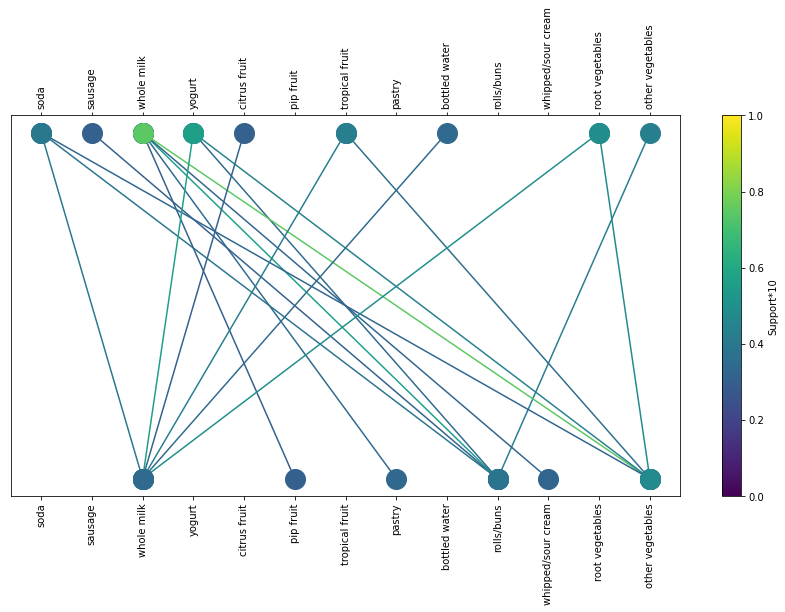

In [9]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20)

# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.